In [1]:

import cv2
import matplotlib.pyplot as plt
import numpy as np
import imageio
from PIL import Image, ImageDraw
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


from tensorflow.keras.utils import to_categorical

from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow import keras

import pandas as pd
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.initializers import GlorotUniform, RandomUniform
from sklearn.model_selection import cross_val_score, KFold, train_test_split

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
#READ IMAGES FROM FOLDER
counter=0
labels=[]
images=[]
def read_all_images(x):

    folder=r'C:\Users\yigit\Desktop\sonset\\'+ str(x) +''
    
    
    for filename in os.listdir(folder):
        img=Image.open(os.path.join(folder,filename)).convert("RGB")
        #img = cv2.imread(os.path.join(folder,filename),cv2.IMREAD_GRAYSCALE)
        img=np.array(img)
        img=img.astype('float32')
        if(x=='uygun'):
            labels.append(0)
        elif(x=='yansimali'):
            labels.append(1)
        elif(x=='overexpo'):
            labels.append(2)
        elif(x=='bulanik'):
            labels.append(3)
        elif(x=='karanlik'):
            labels.append(4)
 
        if img is not None:
            images.append(img)
            
    return images



images=read_all_images('uygun')
images=read_all_images('yansimali')
images=read_all_images('overexpo')
images=read_all_images('bulanik')
images=read_all_images('karanlik')
print(len(images))
print(len(labels))

for i in range(len(labels)):
    print(labels[i])

294
294
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4


In [2]:
def plotHistory(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [3]:

def CNN(X,y):
    X=X.reshape(-1, 128, 128, 3)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, shuffle=True, random_state=1)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2,stratify=y_train, shuffle=True, random_state=1)
    # building a linear stack of layers with the sequential model
    
    
    
    model = Sequential()
    model.add(Conv2D(16, kernel_size=(3) ,activation='relu',input_shape=(128,128,3),padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D())
    #model.add(Dropout(0.2))
    model.add(Conv2D(32, 3, activation='relu',padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D())
    model.add(Dropout(0.2))
    model.add(Conv2D(64, 3, activation='relu',padding='same'))
    model.add(LeakyReLU(alpha=0.1))                  
    model.add(MaxPooling2D())
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(LeakyReLU(alpha=0.1))  
    model.add(Dropout(0.5))
    model.add(Dense(5, activation='softmax'))
    print(model.summary())
    model.compile(loss= 'sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
    
    batches = 25
    epochs=150
    # fit model
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batches, verbose=1)
    plotHistory(model.history)

    _, validation_accuracy = model.evaluate(X_val, y_val, batch_size=batches)
    _, test_accuracy = model.evaluate(X_test, y_test, batch_size=batches)

    print('Validation Accuracy: %f, Test Accuracy: %.3f'  % (validation_accuracy*100, test_accuracy*100))
    return model



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 16)      448       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 128, 128, 16)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0

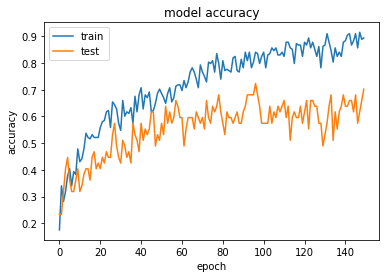

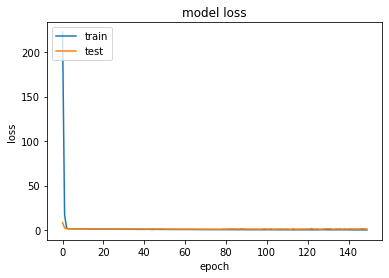

3/3 [==============================] - 0s 21ms/step - loss: 1.6951 - accuracy: 0.7119
Validation Accuracy: 70.212764, Test Accuracy: 71.186


In [4]:

images=np.array(images)
labels=np.array(labels)

imagesfinal=[]
for i in range(len(images)):
    imagesfinal.append(cv2.resize(images[i], dsize=(128, 128), interpolation=cv2.INTER_CUBIC))


imagesfinal=np.array(imagesfinal)
model=CNN(imagesfinal,labels)

In [21]:
def read_all_imagesss(x):
    images1=[]
    folder=r'C:\Users\yigit\Desktop\asd\\'+ str(x) +''
    
    
    for filename in os.listdir(folder):
        img=Image.open(os.path.join(folder,filename)).convert("RGB")
        #img = cv2.imread(os.path.join(folder,filename),cv2.IMREAD_GRAYSCALE)
        img=np.array(img)
        img=img.astype('float32')
  
        if img is not None:
            images1.append(img)
            
    return images1

images1=[]
images1=read_all_imagesss('uygun')
images1=np.array(images1)


from sklearn import metrics
    
class_names=['uygun','yansimali','overexpo','bulanik','karanlik']   


    
img = keras.preprocessing.image.load_img(r'C:\Users\yigit\Desktop\asd\bulanik\13146_right.jpg', target_size=(128, 128))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

    


print("This image most likely belongs to {} with a {:.2f} percent confidence."
          .format(class_names[np.argmax(score)], 100 * np.max(score))
 )

71 294
This image most likely belongs to yansimali with a 40.17 percent confidence.
